In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = "https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

# Create a request object
response = requests.get(url)

In [3]:
# Check for successful response
response.status_code

200

In [4]:
s = response.text
len(s)

141268

In [5]:
s[:1000]

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" siz

In [6]:
# Save the entire HTML content to a file named 'webpage.html'
with open('webpage.html','w',encoding='utf-8') as f:
    f.write(s)

In [7]:
# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

In [8]:
selection_class = "_4rR01T"

model_tags = soup.find_all('div',{'class':selection_class})

In [9]:
model_tags[0].text

'POCO C51 (Royal Blue, 64 GB)'

In [10]:
model = []
for tag in model_tags:
    model.append(tag.text)
model
len(model)

24

In [11]:
#<div class="_30jeq3 _1_WHN1">₹11,999</div>
selection_class = "_30jeq3 _1_WHN1"

price_tag = soup.find_all('div',{'class':selection_class})

In [12]:
price = []
for tag in price_tag:
    price.append(tag.text)
price

['₹5,499',
 '₹4,999',
 '₹12,999',
 '₹12,999',
 '₹11,999',
 '₹11,999',
 '₹11,999',
 '₹14,999',
 '₹12,999',
 '₹14,999',
 '₹14,999',
 '₹11,999',
 '₹5,499',
 '₹58,999',
 '₹20,769',
 '₹9,999',
 '₹20,694',
 '₹9,999',
 '₹7,299',
 '₹19,430',
 '₹6,299',
 '₹13,999',
 '₹10,999',
 '₹58,999']

In [13]:
selection_class = "_1xgFaf"

storage_tags = soup.find_all('ul',{'class':selection_class})

In [14]:
details = []
for tag in storage_tags:
    ul_text_lines = tag.get_text(separator='\n').splitlines()

    # Remove empty lines from the result
    ul_text_lines = list(filter(None, ul_text_lines))

    details.append(ul_text_lines)
len(details)

24

In [15]:
for i in range(len(model)):
    details[i].insert(0,(model[i]))
    
    details[i].insert(1,price[i])
    
details

[['POCO C51 (Royal Blue, 64 GB)',
  '₹5,499',
  '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
  '16.56 cm (6.52 inch) HD+ Display',
  '8MP Dual Rear Camera | 5MP Front Camera',
  '5000 mAh Battery',
  'Helio G36 Processor',
  '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'],
 ['POCO C51 - Locked with Airtel Prepaid (Royal Blue, 64 GB)',
  '₹4,999',
  '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
  '16.56 cm (6.52 inch) HD+ Display',
  '8MP Dual Rear Camera | 5MP Front Camera',
  '5000 mAh Battery',
  'Helio G36 Processor',
  '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'],
 ['vivo T2x 5G (Marine Blue, 128 GB)',
  '₹12,999',
  '6 GB RAM | 128 GB ROM',
  '16.71 cm (6.58 inch) Full HD+ Display',
  '50MP + 2MP | 8MP Front Camera',
  '5000 mAh Battery',
  'Dimensity 6020 Processor',
  '1 Year of Device & 6 Months for Inbox Accessories'],
 ['vivo T2x 5G (Glimmer Black, 128 GB)',
  '₹12,999',
  '6 GB RAM | 

In [16]:
df = pd.DataFrame(details)
df

,0,1,2,3,4,5,6,7,8
0,"POCO C51 (Royal Blue, 64 GB)","₹5,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,None
1,POCO C51 - Locked with Airtel Prepaid (Royal B...,"₹4,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,None
2,"vivo T2x 5G (Marine Blue, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
3,"vivo T2x 5G (Glimmer Black, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
4,"vivo T2x 5G (Marine Blue, 128 GB)","₹11,999",4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
5,"vivo T2x 5G (Glimmer Black, 128 GB)","₹11,999",4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
6,"vivo T2x 5G (Aurora Gold, 128 GB)","₹11,999",4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
7,"vivo T2x 5G (Marine Blue, 128 GB)","₹14,999",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
8,"vivo T2x 5G (Aurora Gold, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
9,"vivo T2x 5G (Aurora Gold, 128 GB)","₹14,999",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None


In [18]:
df.to_csv('Modiles_flipkart')

---
---

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [43]:
nun_counts = df.isna().sum(axis=1)
filtered_df = df[nun_counts == 1]
filtered_df = filtered_df.dropna(axis=1).reset_index(drop=True)

filtered_df.columns = columns = ['Model','Price', 'Memory', 'Size', 'Camera', 'Battery', 'Processor', 'Warranty']

df = filtered_df
df

,Model,Price,Memory,Size,Camera,Battery,Processor,Warranty
0,"POCO C51 (Royal Blue, 64 GB)","₹5,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...
1,POCO C51 - Locked with Airtel Prepaid (Royal B...,"₹4,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...
2,"vivo T2x 5G (Marine Blue, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
3,"vivo T2x 5G (Glimmer Black, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
4,"vivo T2x 5G (Marine Blue, 128 GB)","₹11,999",4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
5,"vivo T2x 5G (Glimmer Black, 128 GB)","₹11,999",4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
6,"vivo T2x 5G (Aurora Gold, 128 GB)","₹11,999",4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
7,"vivo T2x 5G (Marine Blue, 128 GB)","₹14,999",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
8,"vivo T2x 5G (Aurora Gold, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
9,"vivo T2x 5G (Aurora Gold, 128 GB)","₹14,999",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      17 non-null     object 
 1   Price      17 non-null     float64
 2   Memory     17 non-null     object 
 3   Size       17 non-null     object 
 4   Camera     17 non-null     object 
 5   Battery    17 non-null     object 
 6   Processor  17 non-null     object 
 7   Warranty   17 non-null     object 
dtypes: float64(1), object(7)
memory usage: 1.2+ KB


In [57]:
df['Price'] = df['Price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

In [45]:
df.nunique()

Model        11
Price         9
Memory        7
Size          4
Camera        4
Battery       3
Processor     5
Warranty      5
dtype: int64

In [48]:
print('Size         : ',df.Size.unique())
print('Camera       : ',df.Camera.unique())
print('Battery      : ',df.Battery.unique())
print('Processor    : ',df.Processor.unique())
print('Warranty Type: ',df.Warranty.unique())


Size         :  ['16.56 cm (6.52 inch) HD+ Display'
 '16.71 cm (6.58 inch) Full HD+ Display'
 '17.04 cm (6.71 inch) HD+ Display' '16.51 cm (6.5 inch) Full HD+ Display']
Camera       :  ['8MP Dual Rear Camera | 5MP Front Camera' '50MP + 2MP | 8MP Front Camera'
 '50MP Dual Rear Camera | 5MP Front Camera'
 '50MP (OIS) + 8MP | 16MP Front Camera']
Battery      :  ['5000 mAh Battery' '5000 mAh Lithium Ion Polymer Battery'
 '6000 mAh Battery']
Processor    :  ['Helio G36 Processor' 'Dimensity 6020 Processor'
 'Mediatek Dimensity 700 Processor' 'Mediatek Helio G85 Processor'
 'Dimensity 7020 Processor']
Warranty Type:  ['1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'
 '1 Year of Device & 6 Months for Inbox Accessories'
 '1 Year Warranty for Handset and 6 Months for Accessories'
 '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for In the Box Accessories'
 '1 Year on Handset and 6 Months on Accessories']


In [49]:
df.isnull().sum()

Model        0
Price        0
Memory       0
Size         0
Camera       0
Battery      0
Processor    0
Warranty     0
dtype: int64

In [50]:
df.duplicated().sum()

0

In [66]:
df.sort_values(by='Price',inplace=True)

## EDA Analysis

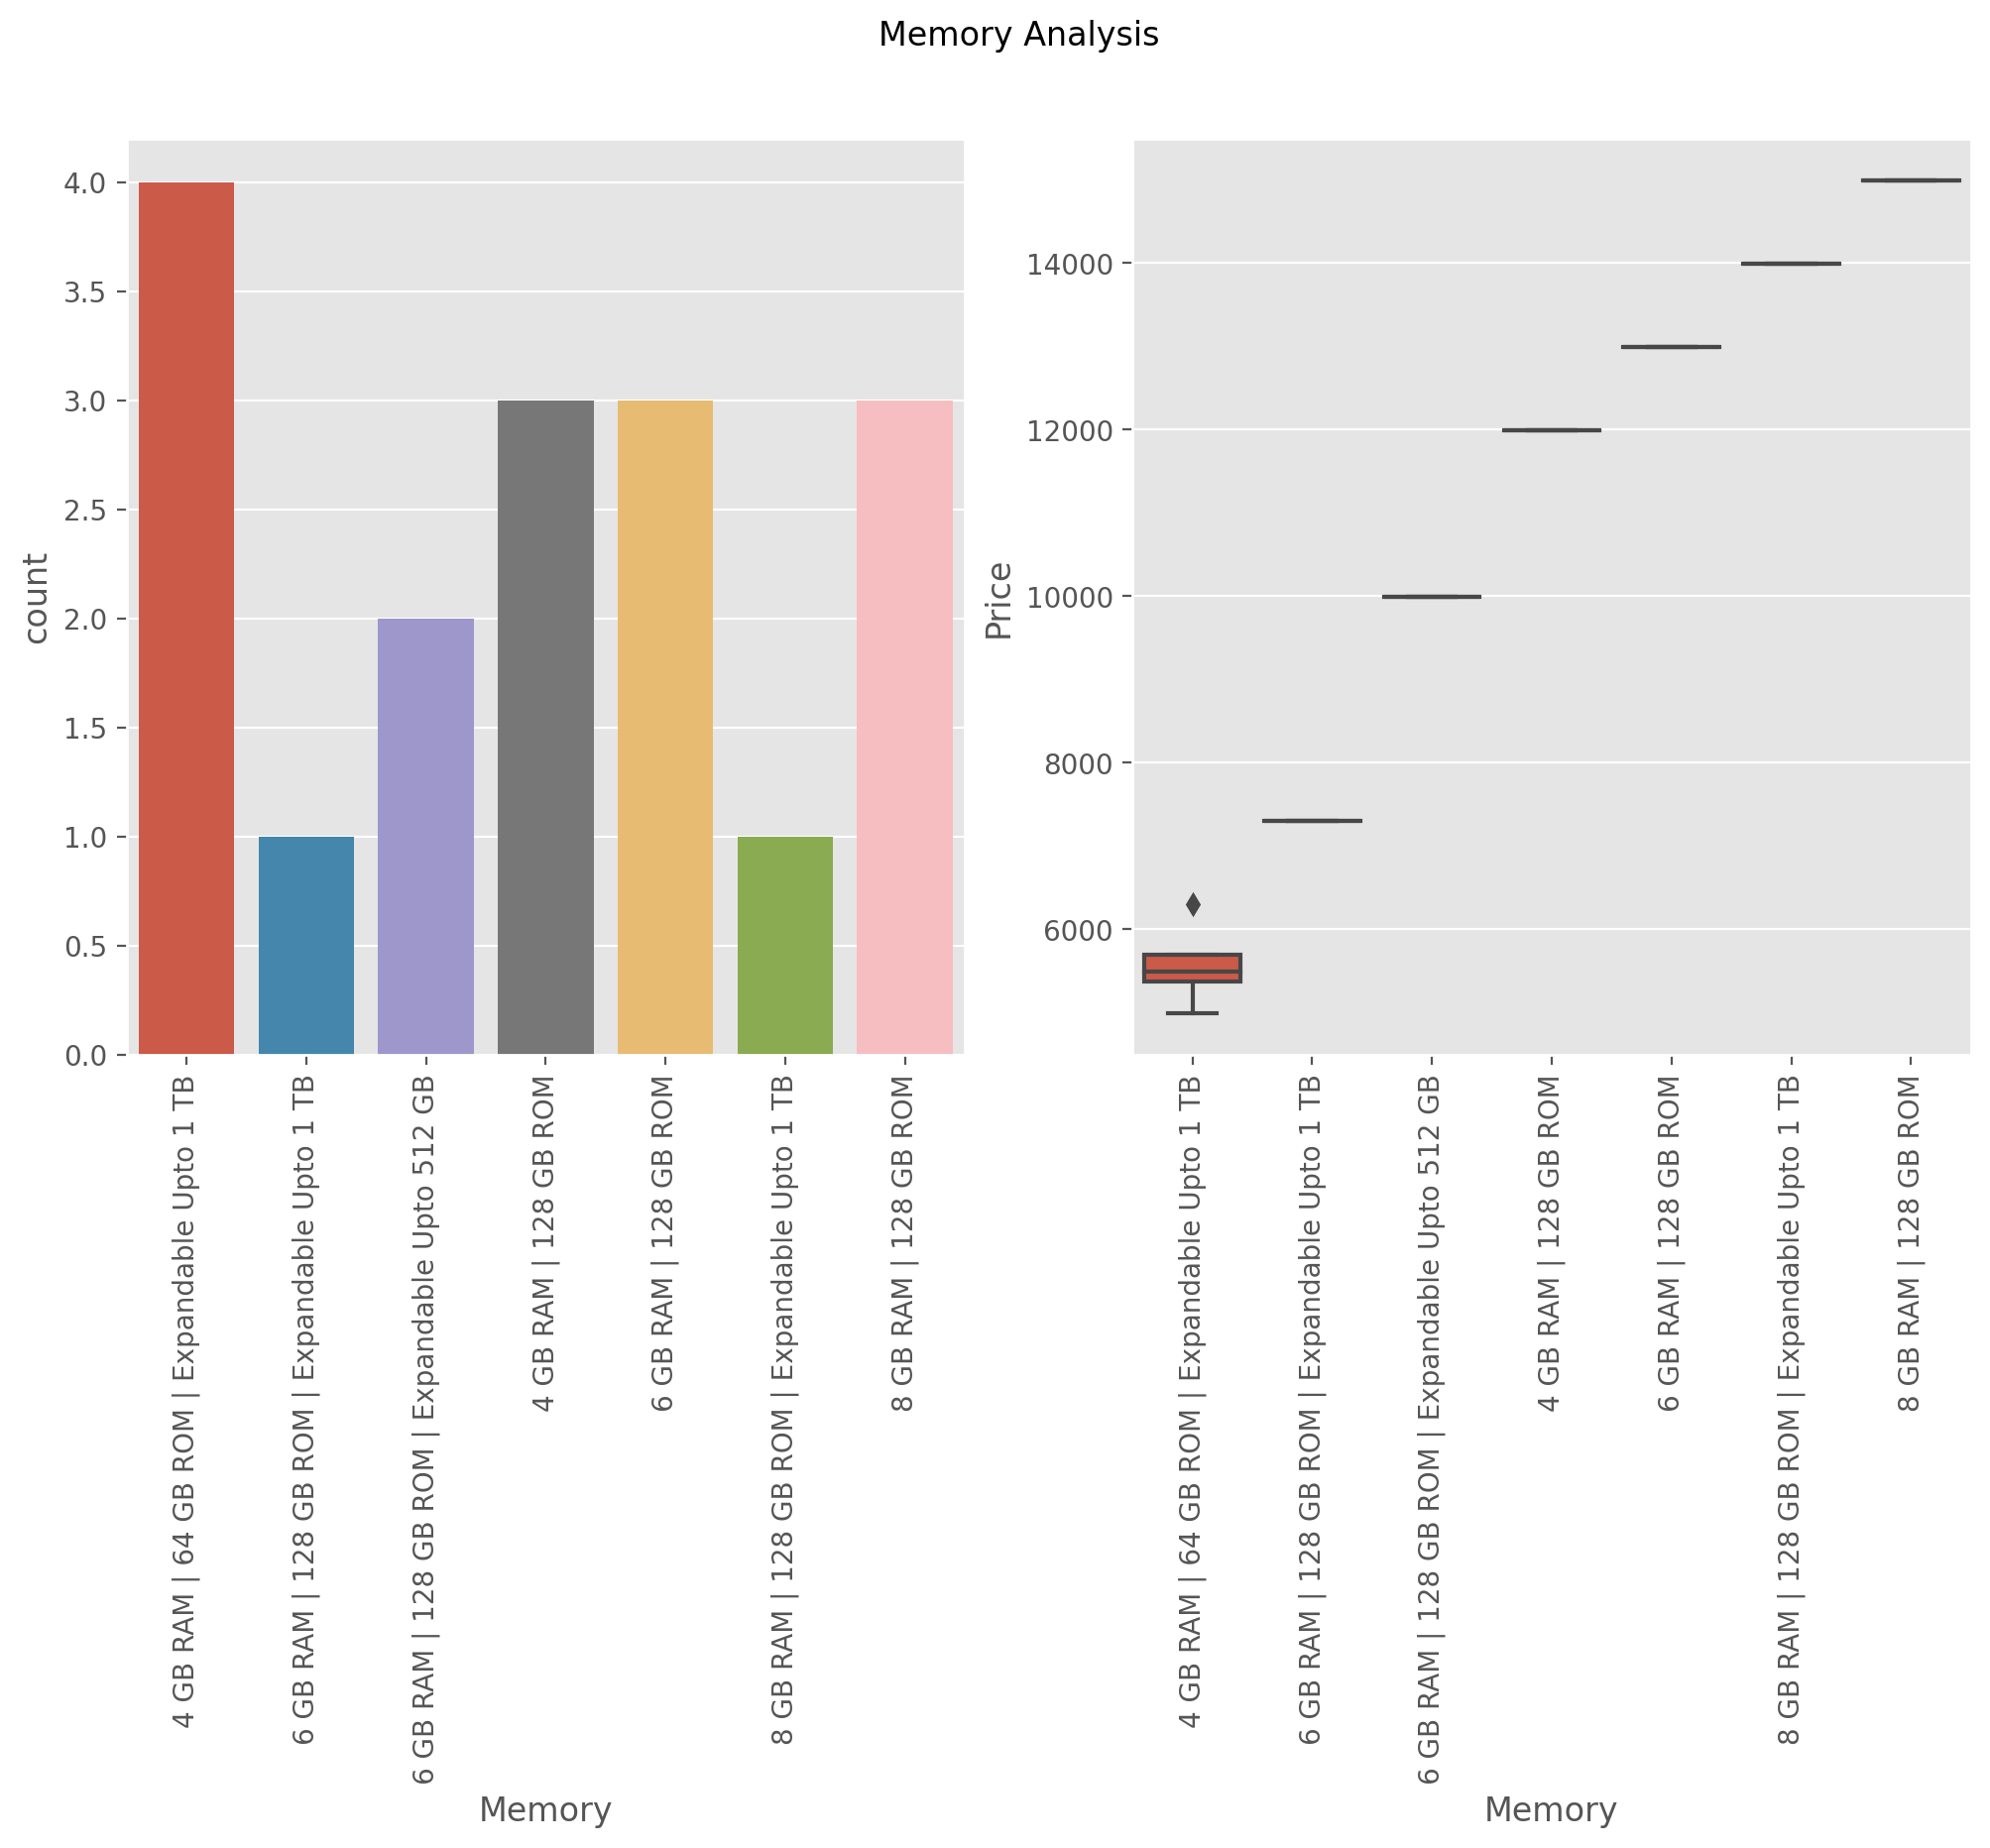

In [67]:
plt.figure(figsize=(12,6), dpi=200)
plt.suptitle('Memory Analysis')
plt.subplot(1,2,1)
sns.countplot(x='Memory', data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='Memory',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

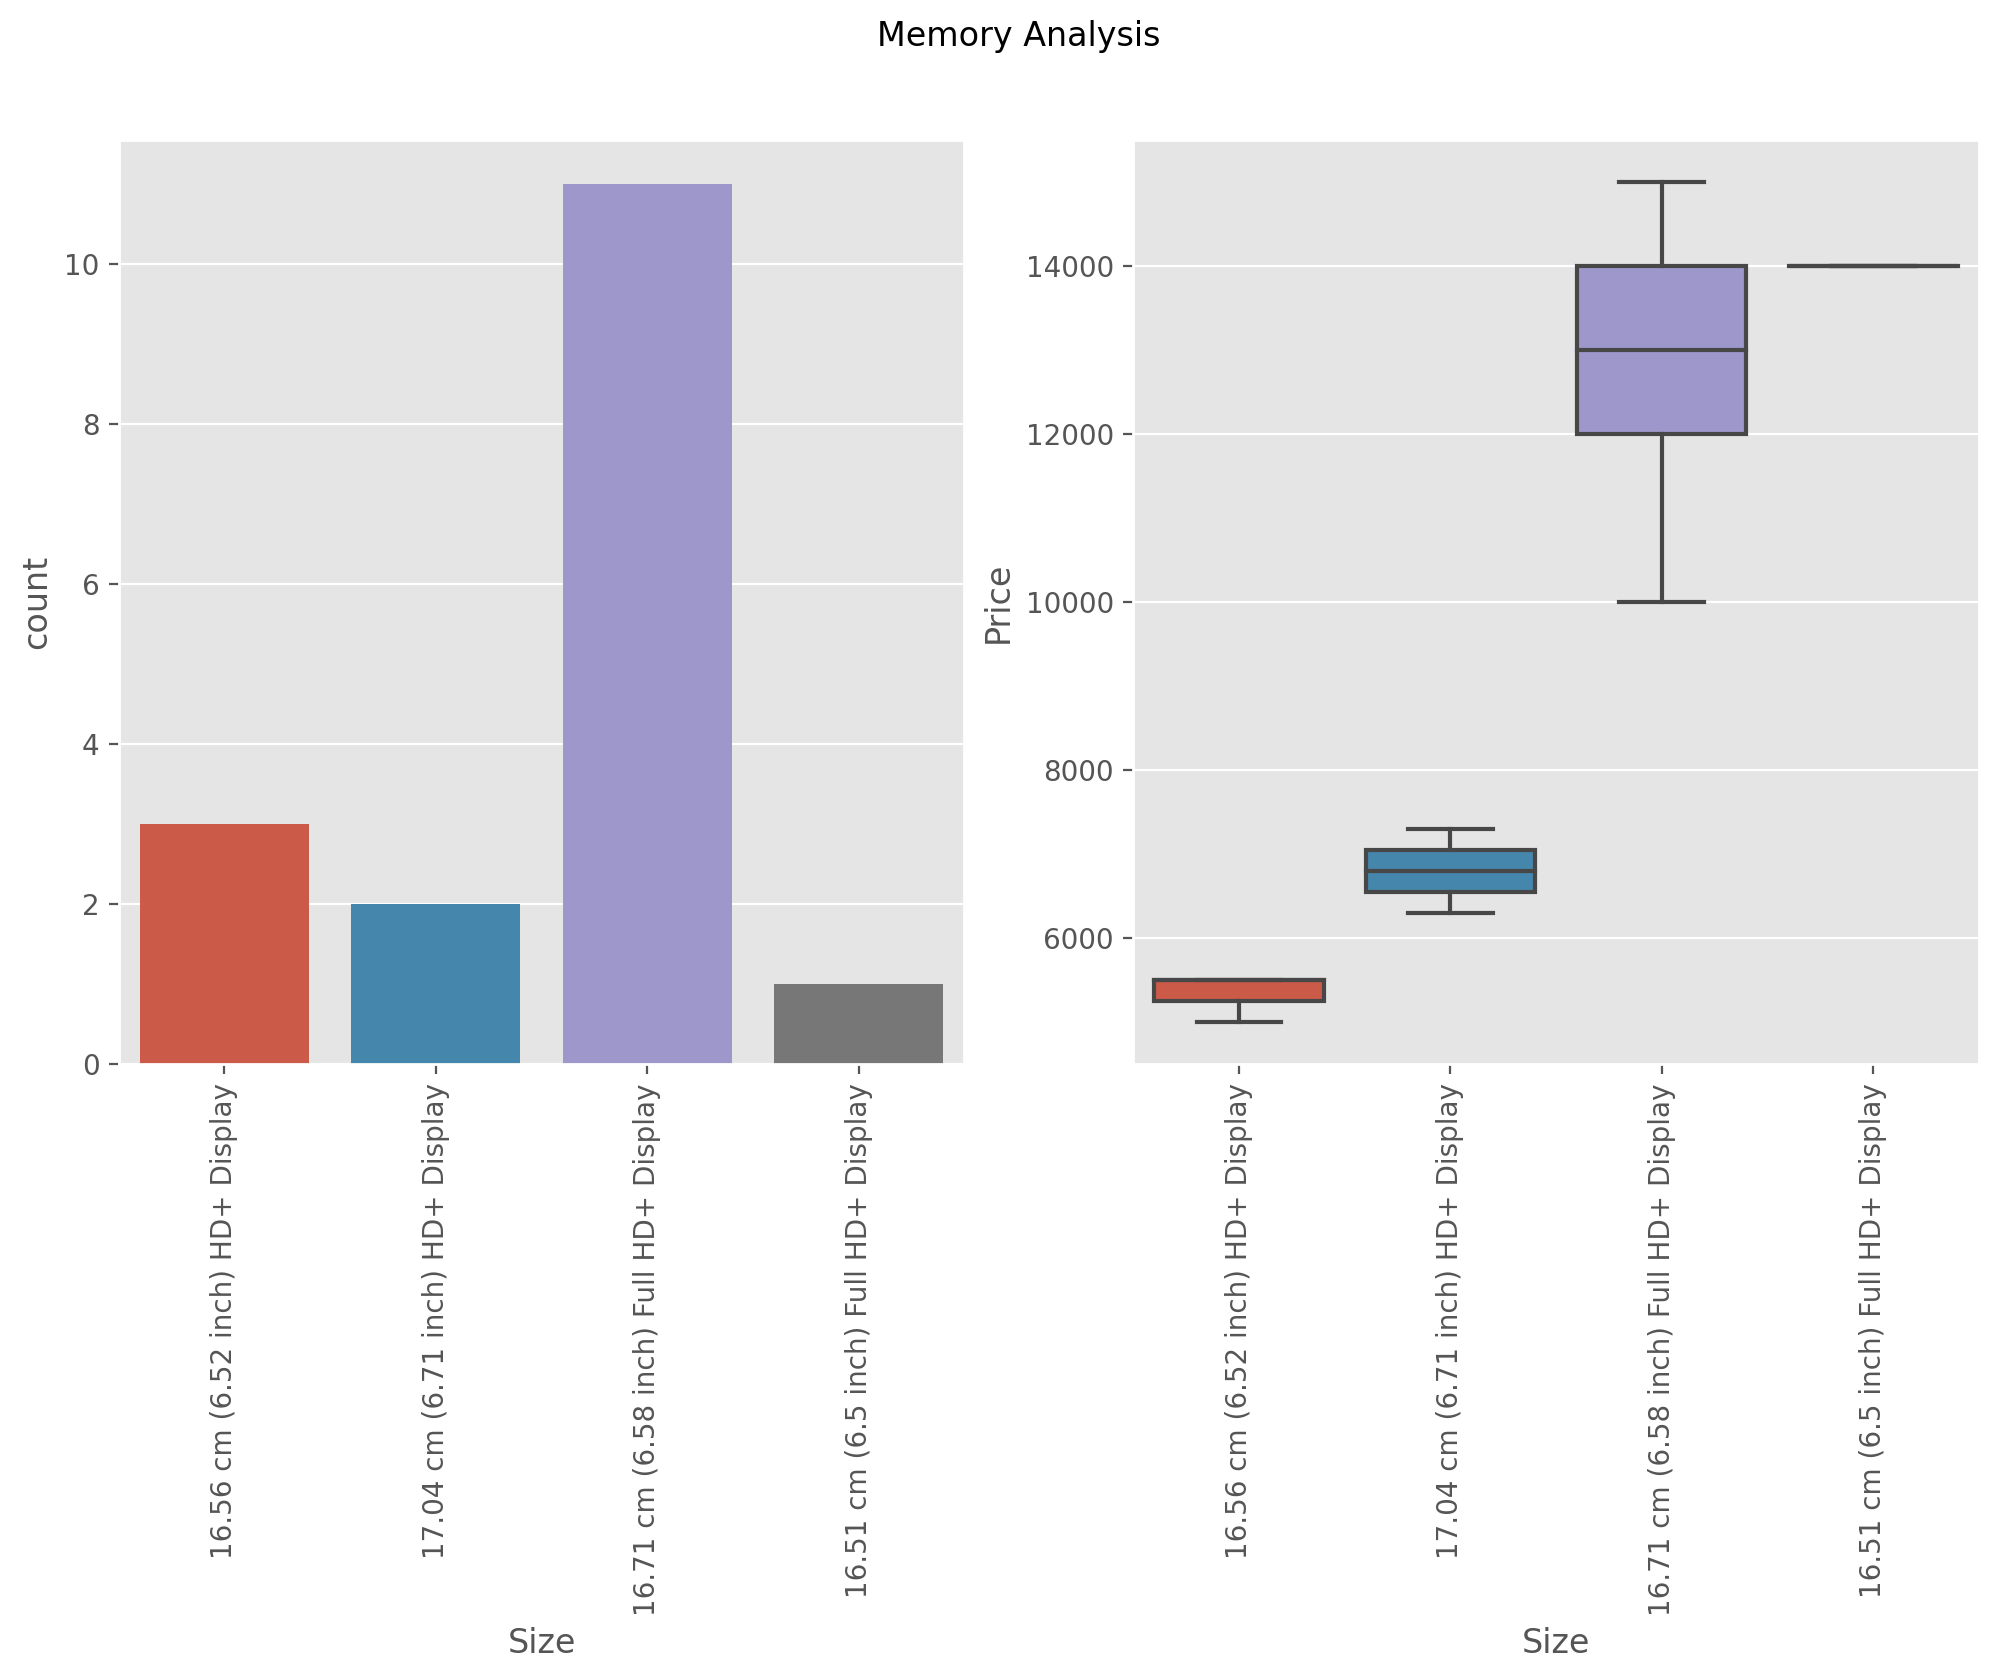

In [68]:
plt.figure(figsize=(12,6), dpi=200)
plt.suptitle('Memory Analysis')
plt.subplot(1,2,1)
sns.countplot(x='Size', data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='Size',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

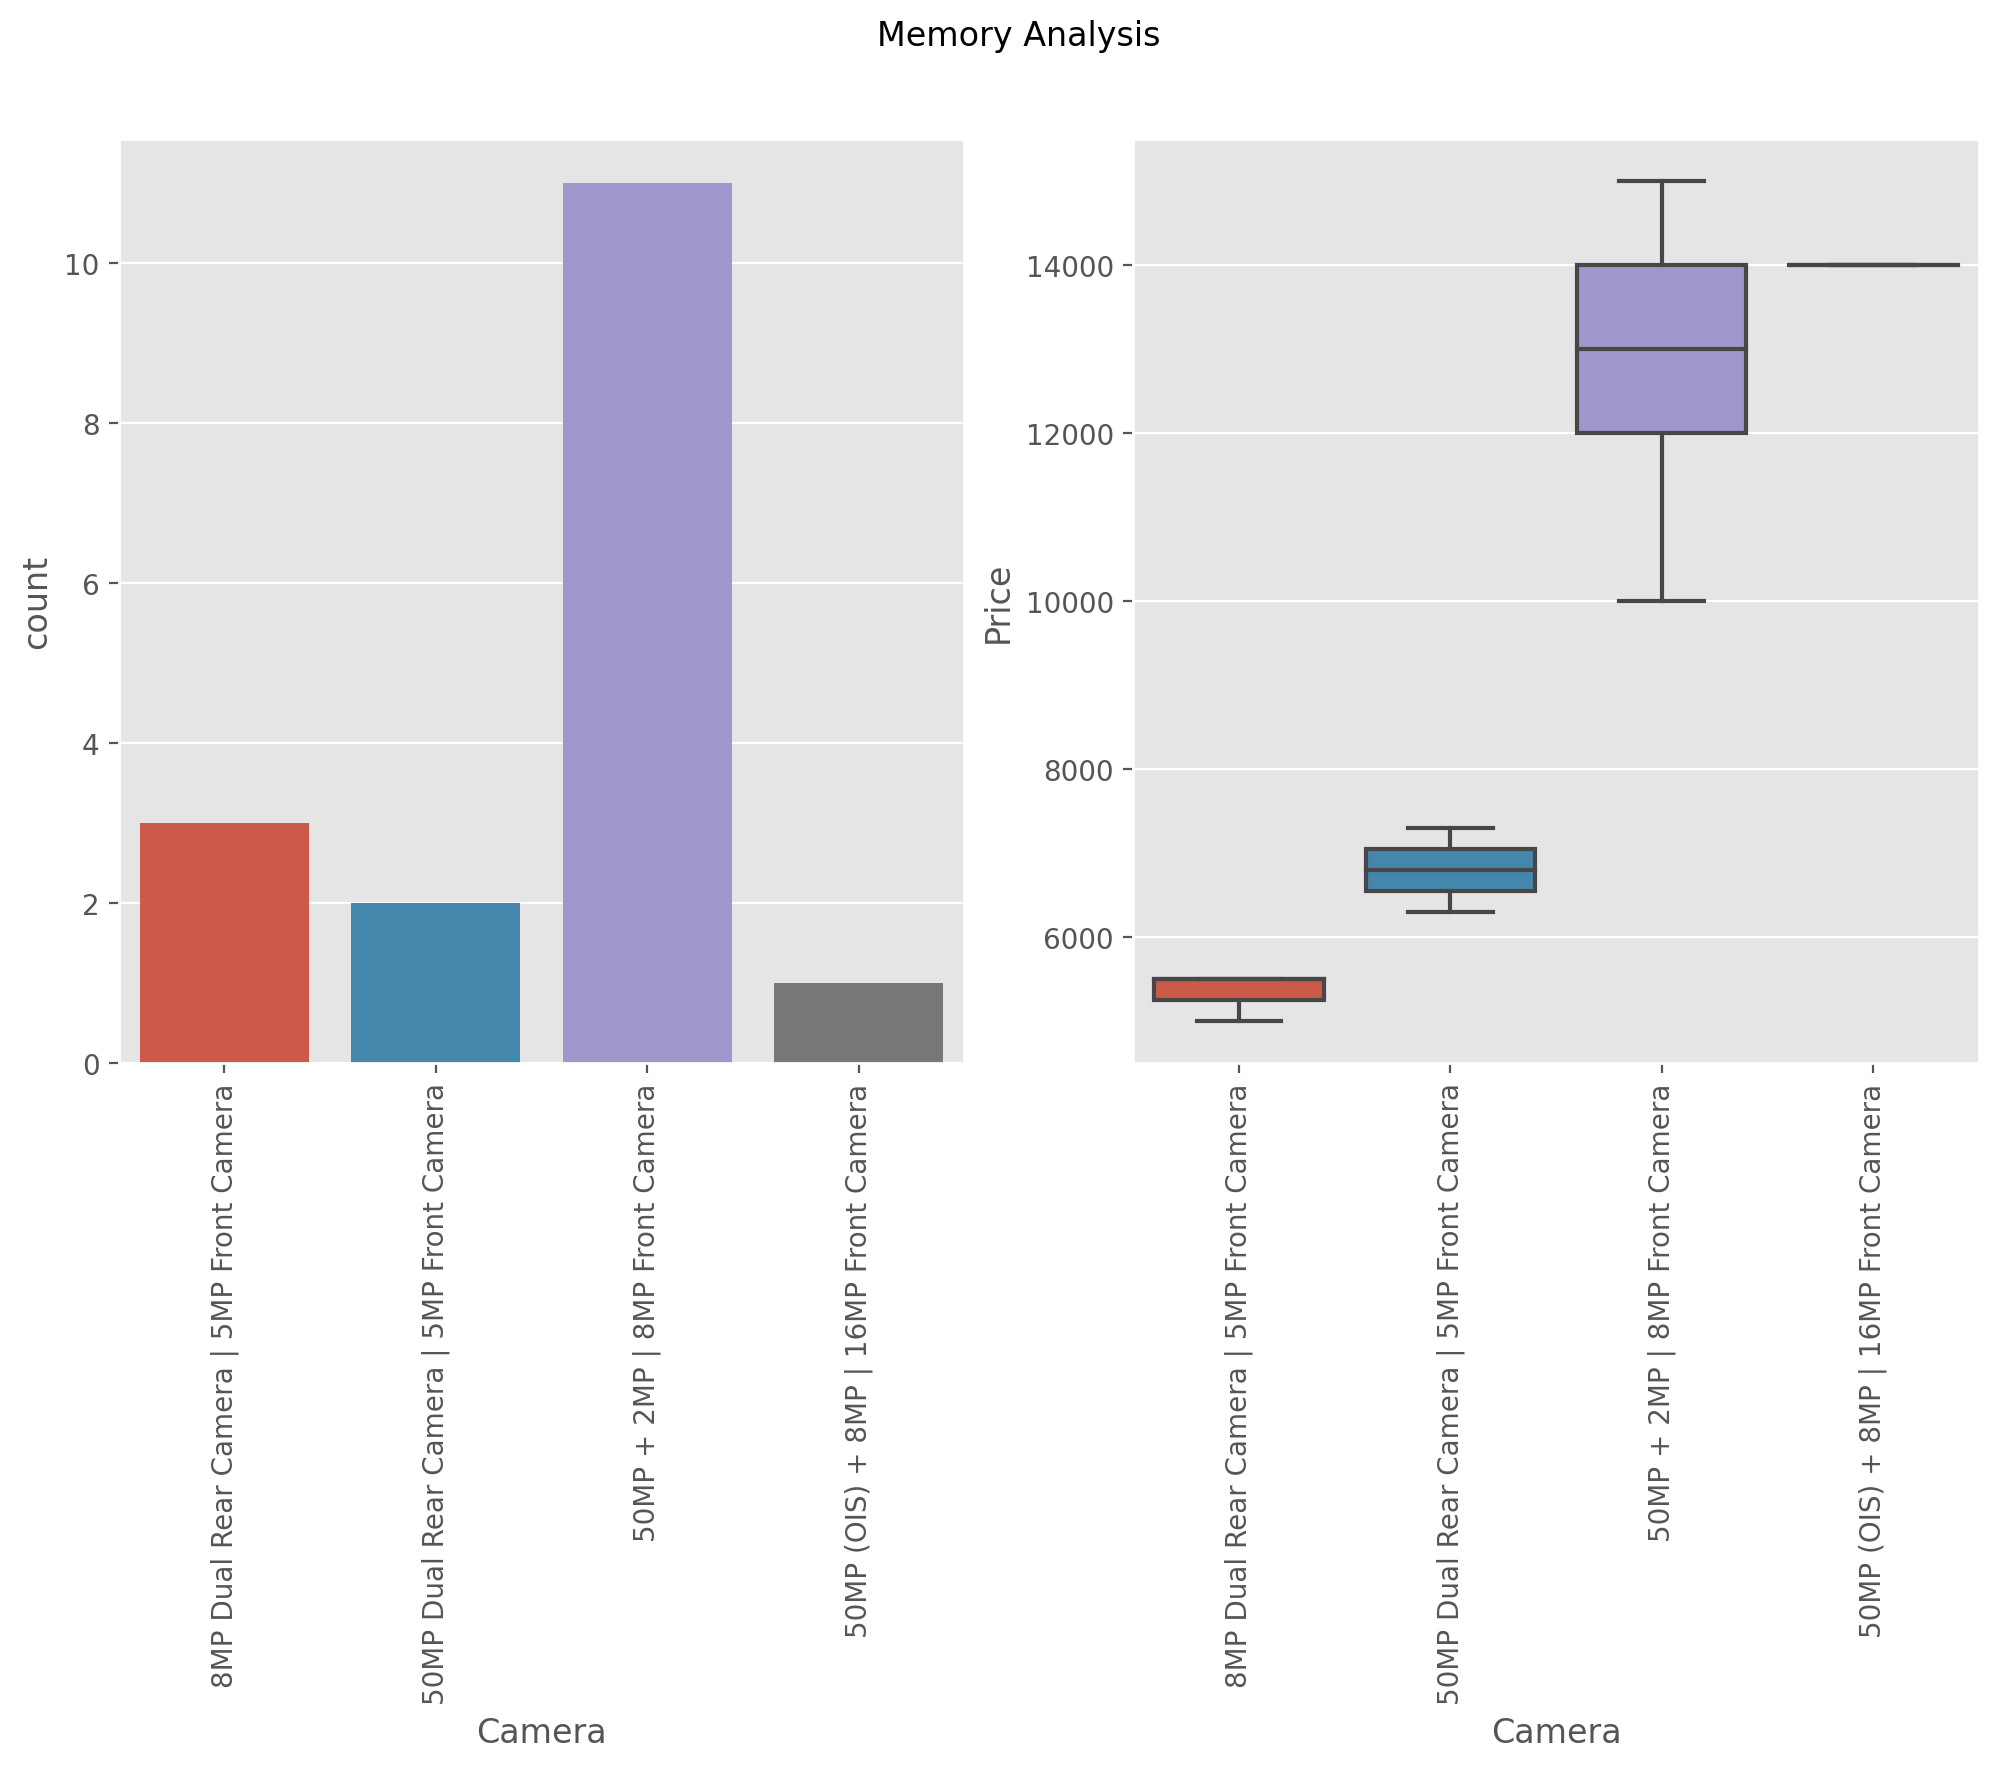

In [69]:
plt.figure(figsize=(12,6), dpi=200)
plt.suptitle('Memory Analysis')
plt.subplot(1,2,1)
sns.countplot(x='Camera', data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='Camera',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

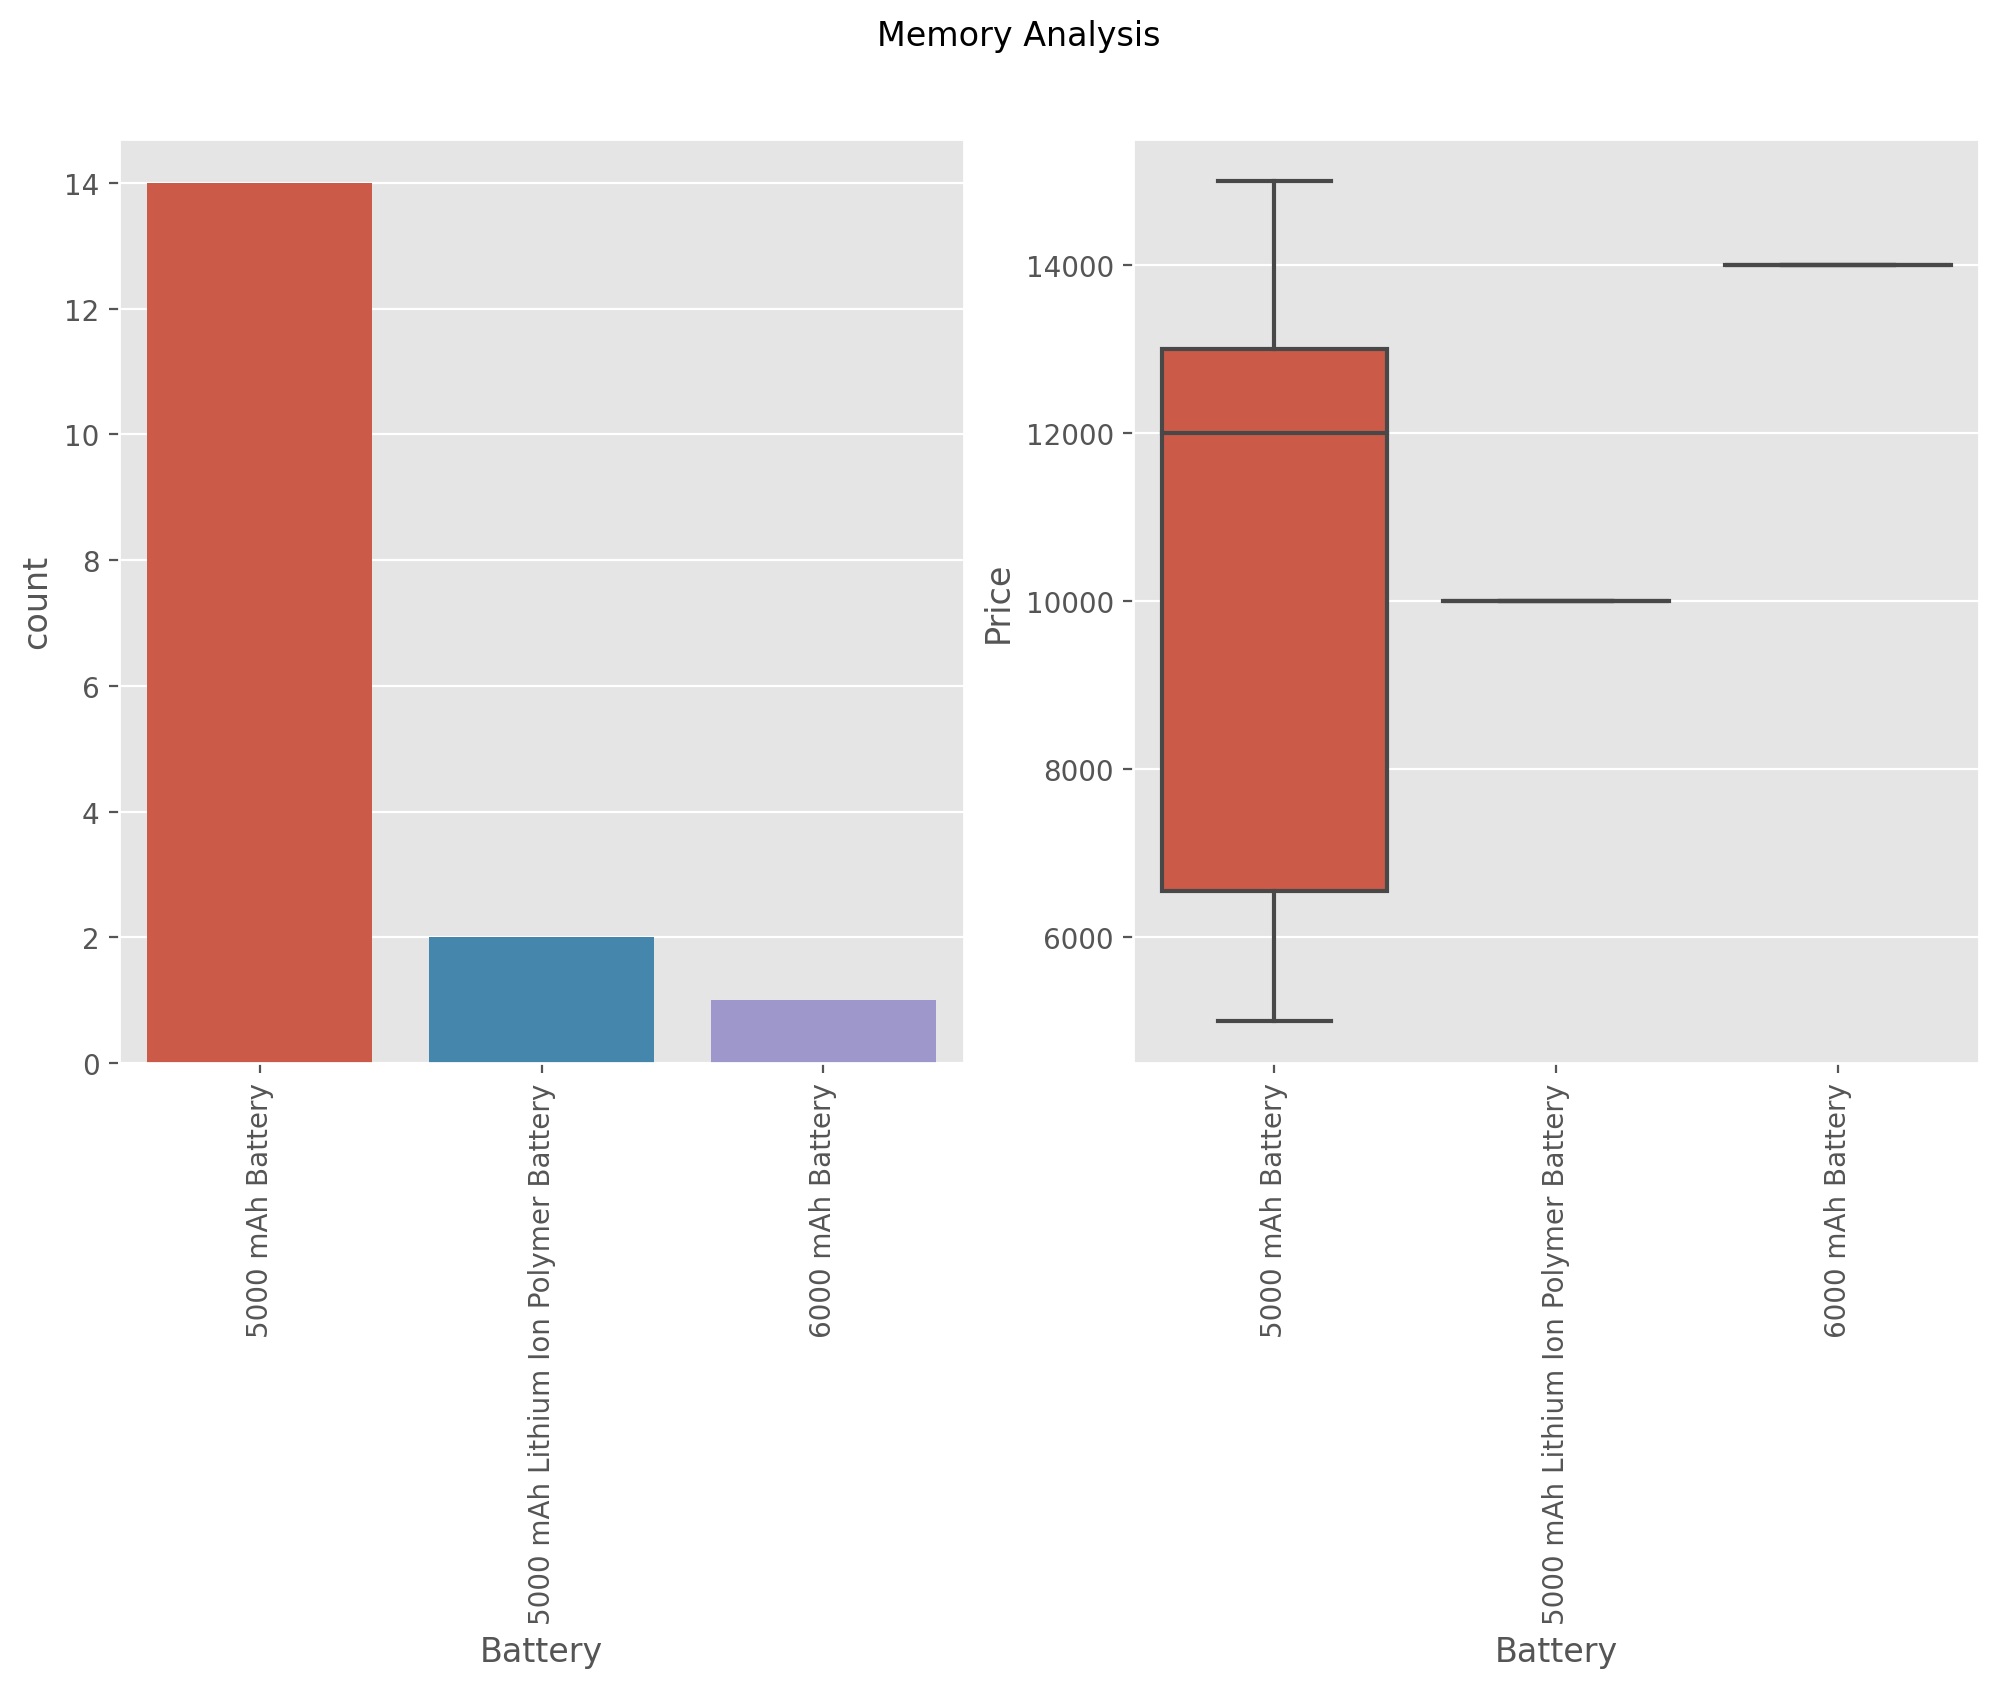

In [70]:
plt.figure(figsize=(12,6), dpi=200)
plt.suptitle('Memory Analysis')
plt.subplot(1,2,1)
sns.countplot(x='Battery', data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='Battery',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

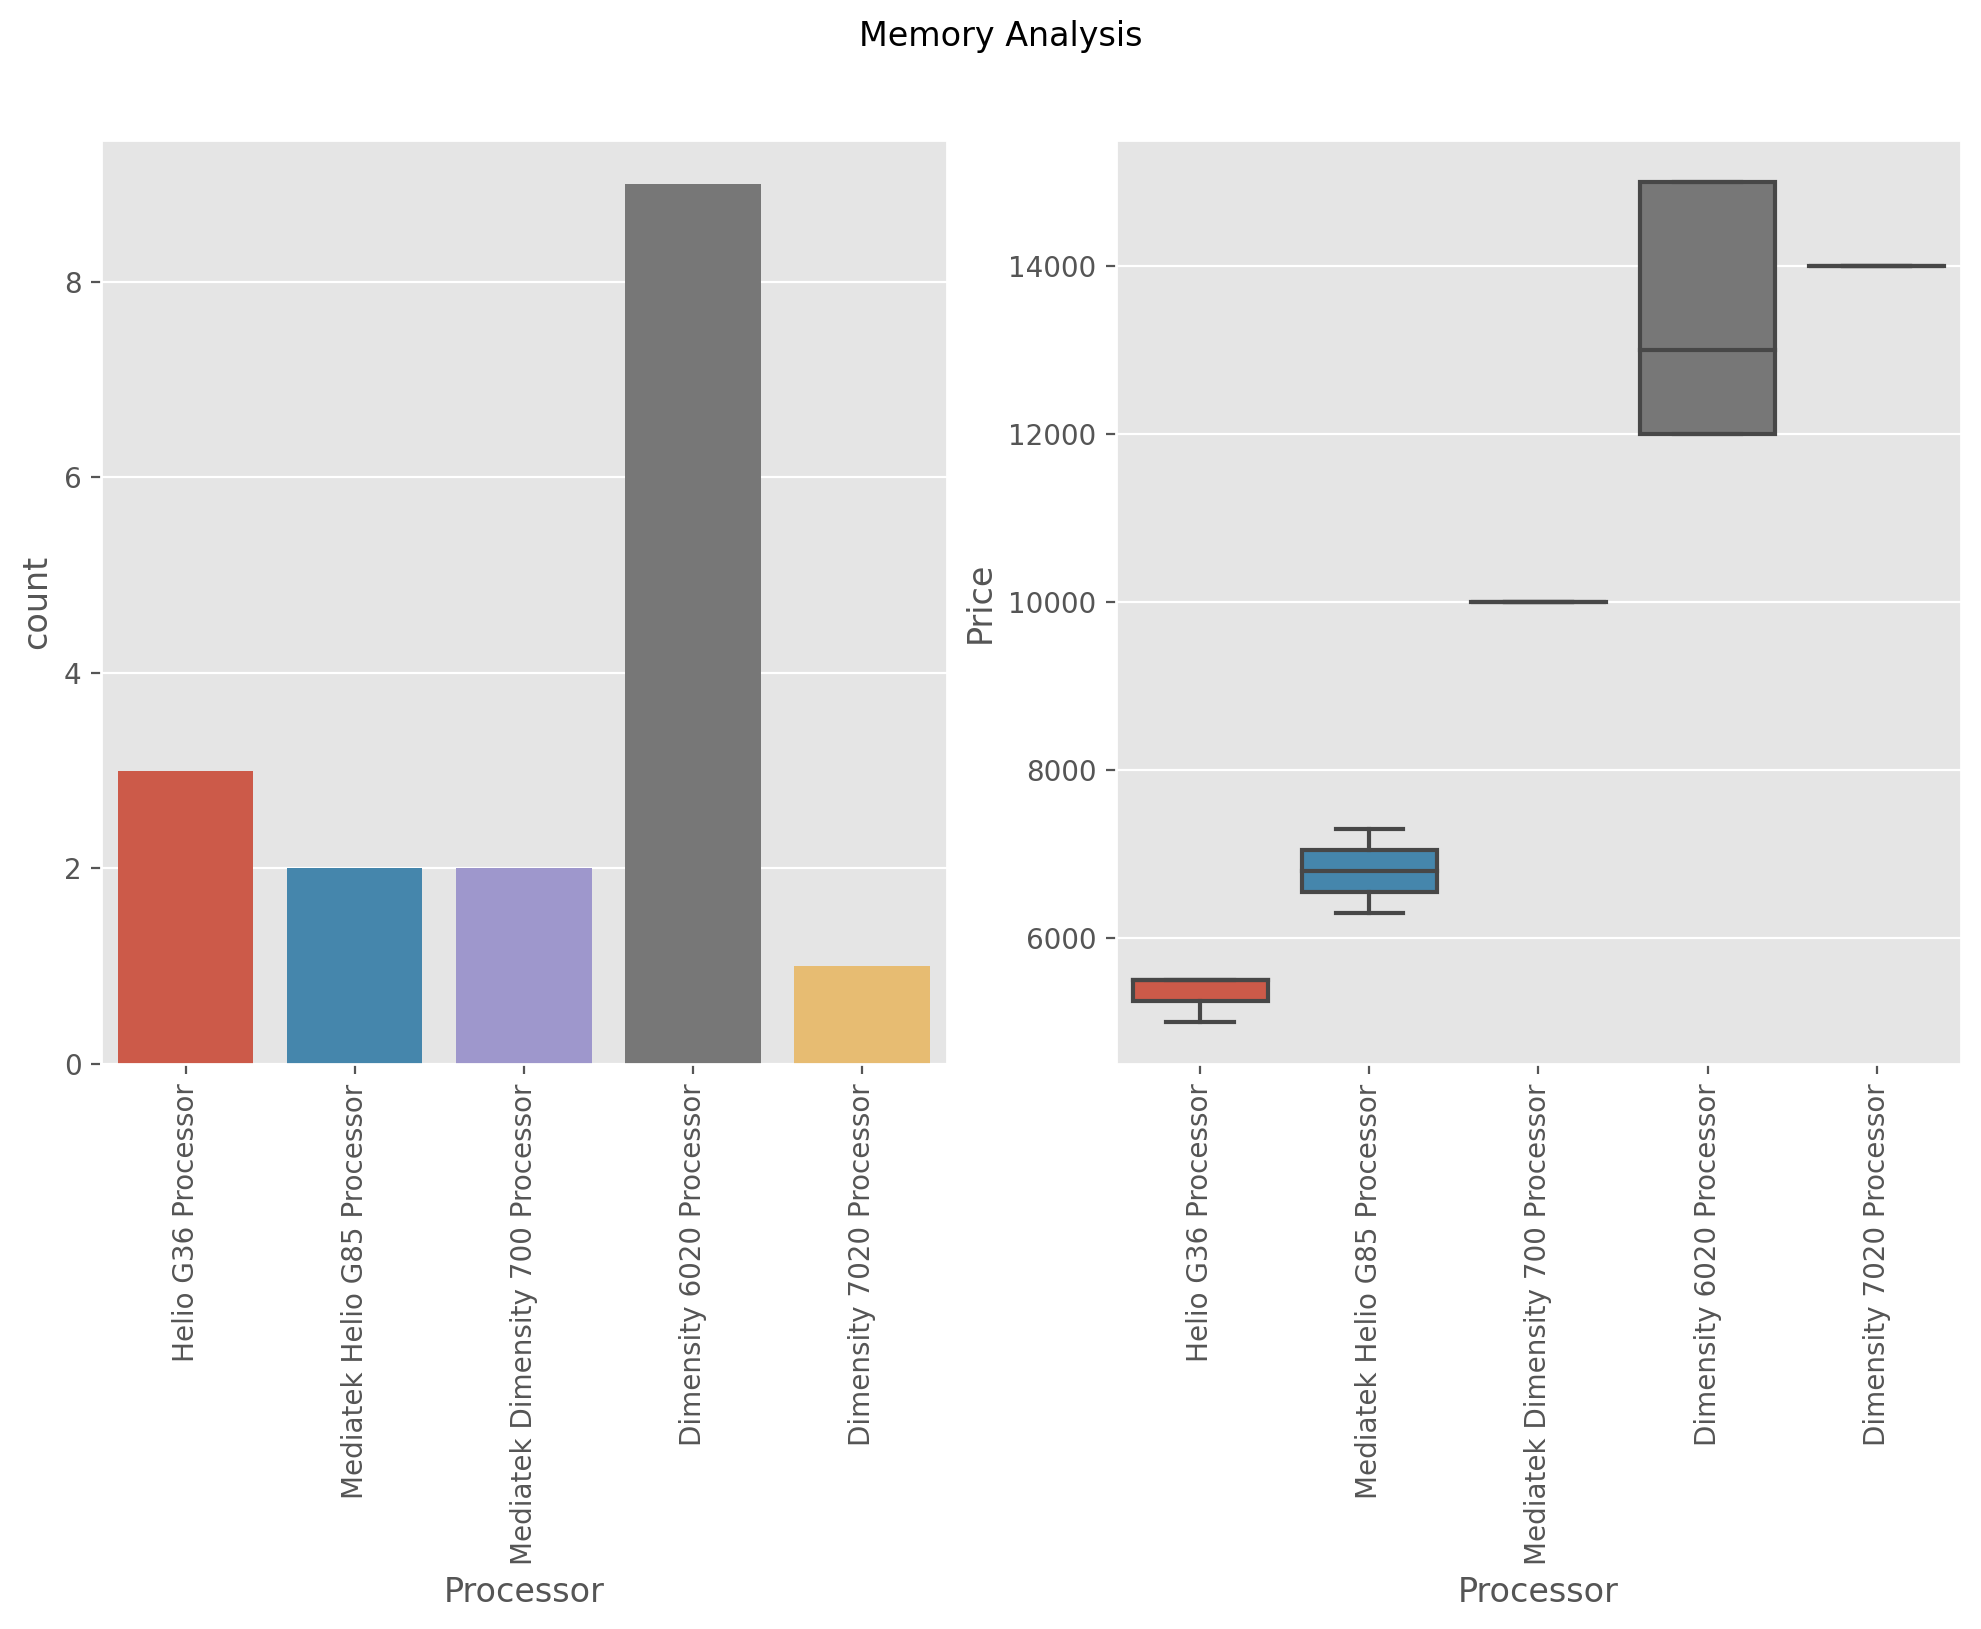

In [71]:
plt.figure(figsize=(12,6), dpi=200)
plt.suptitle('Memory Analysis')
plt.subplot(1,2,1)
sns.countplot(x='Processor', data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='Processor',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

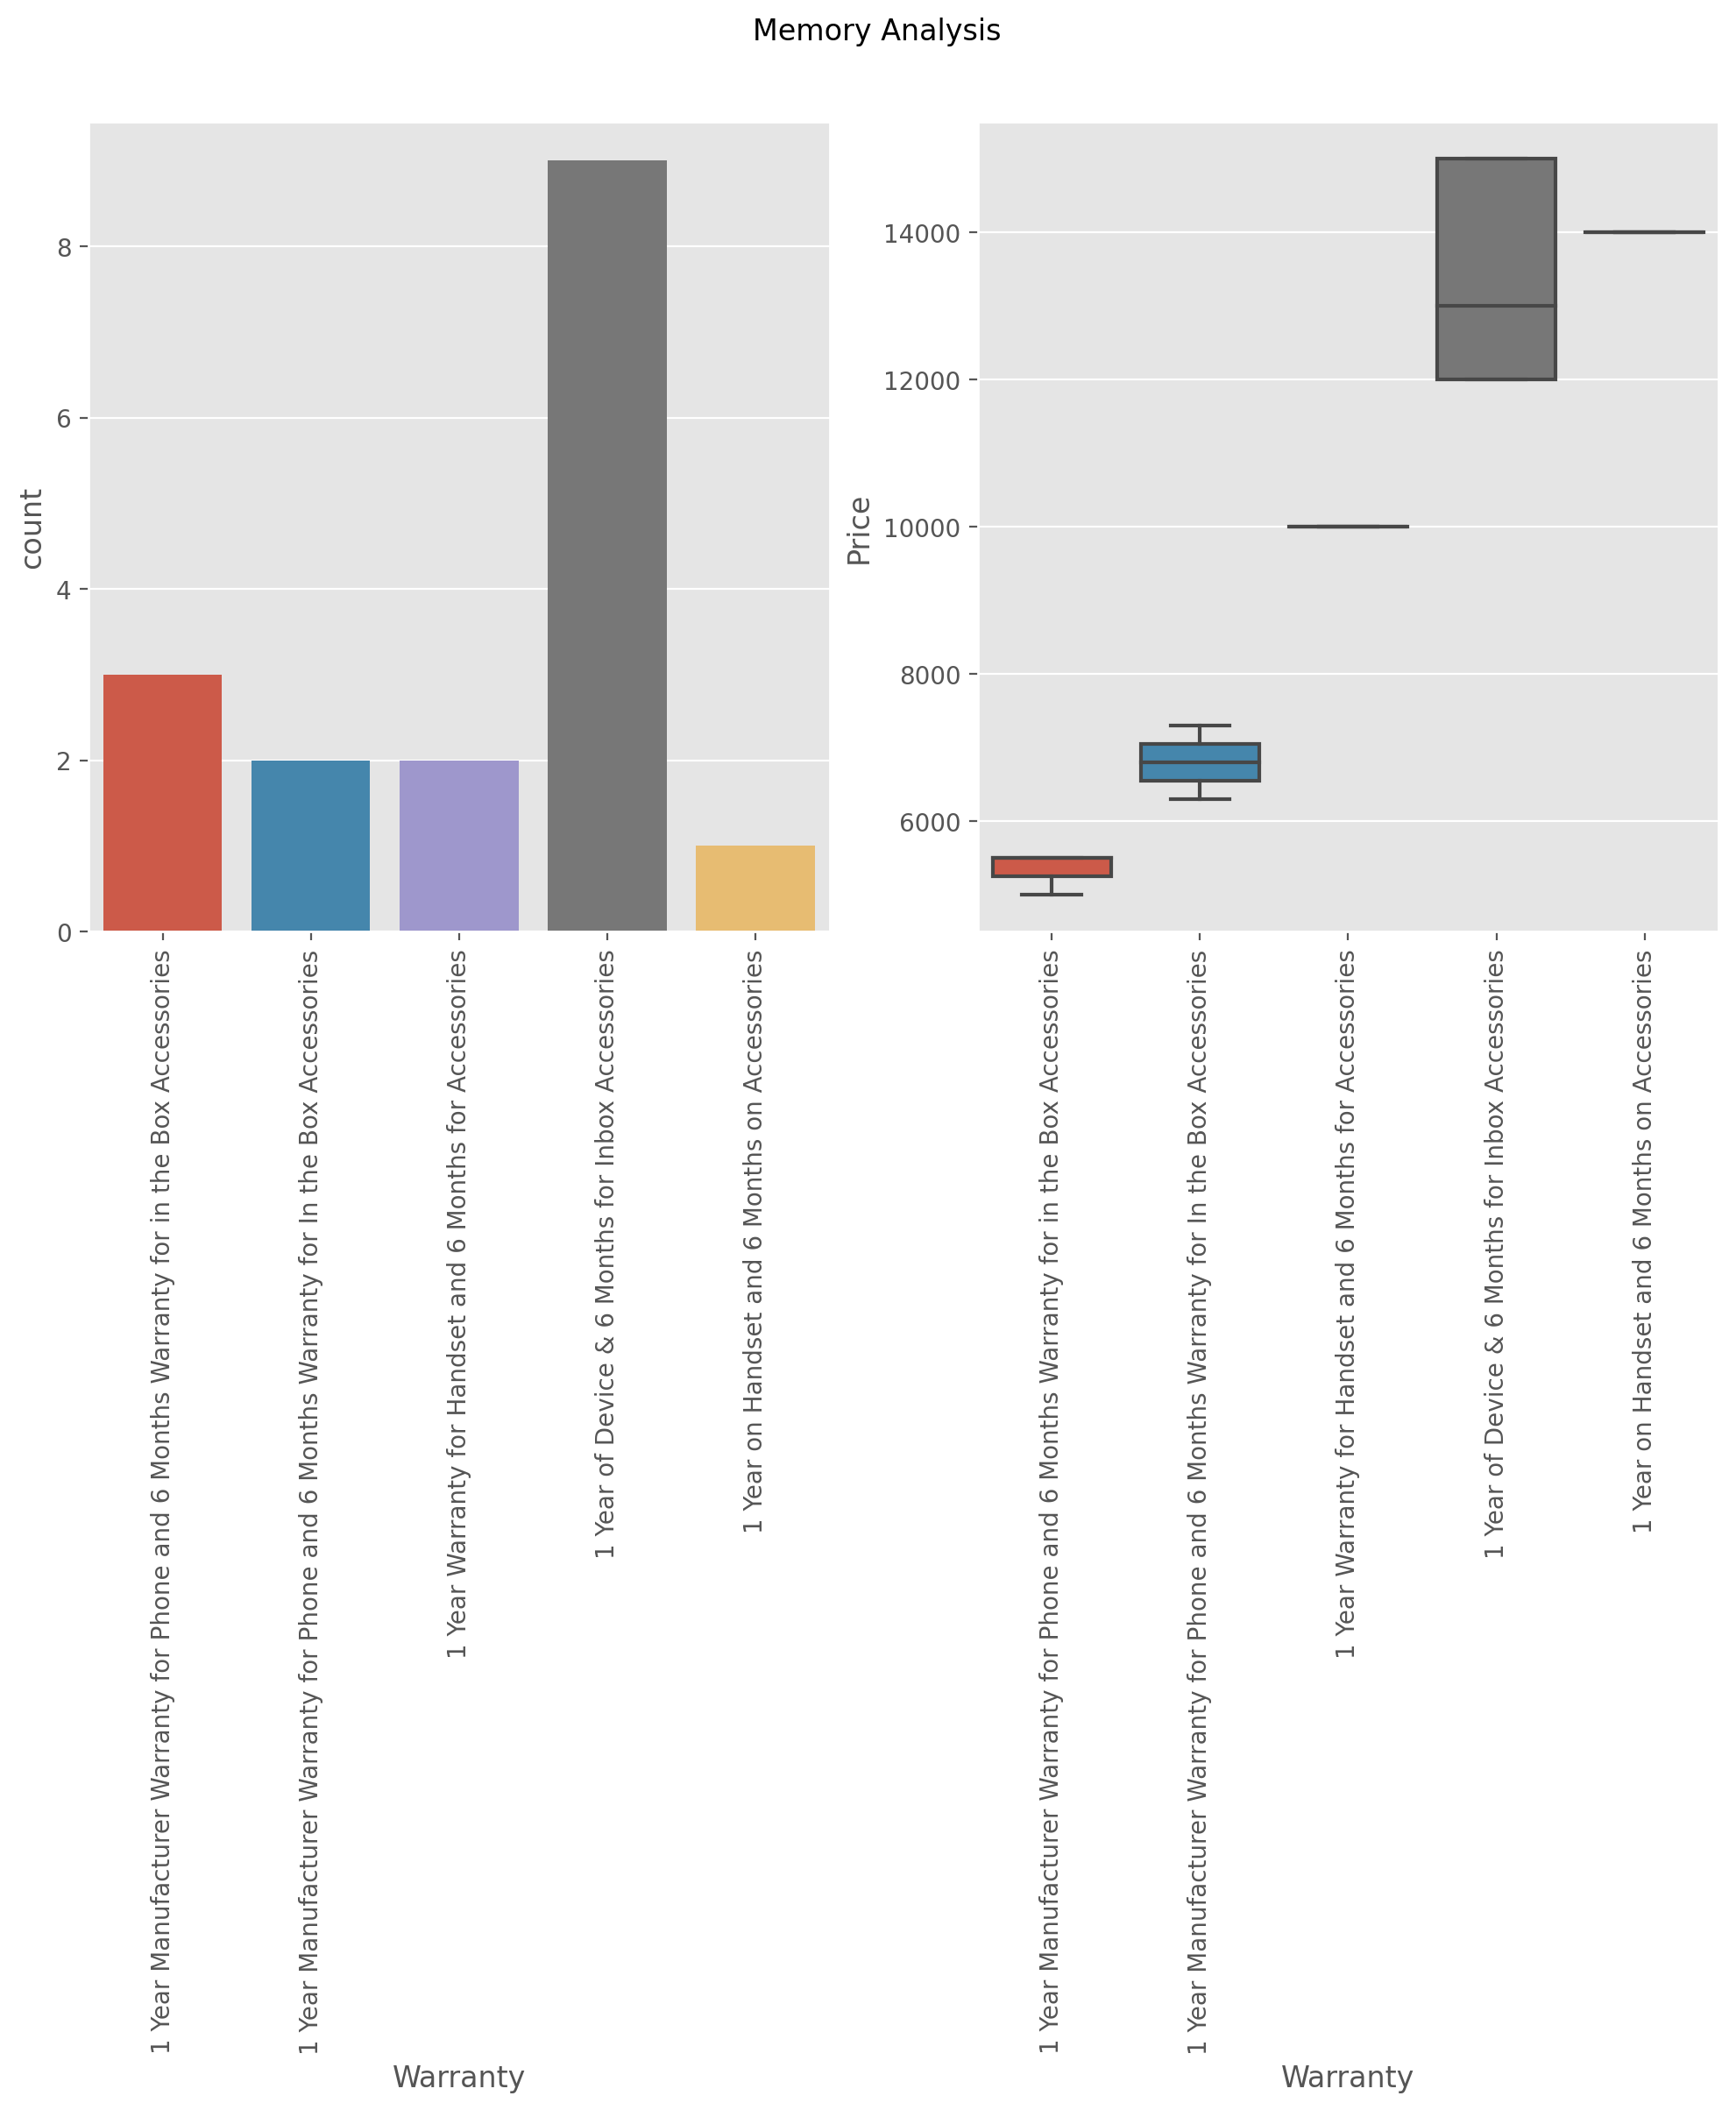

In [72]:
plt.figure(figsize=(12,6), dpi=200)
plt.suptitle('Memory Analysis')
plt.subplot(1,2,1)
sns.countplot(x='Warranty', data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='Warranty',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()